# Fake News Detection

### Importing Required Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
import re
import string
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud

### Loading Datasets

In [2]:
fake_df= pd.read_csv("Fake.csv")
true_df= pd.read_csv("True.csv")

In [3]:
fake_df.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [4]:
true_df.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


***checking the number of rows and columns in both datasets***

In [5]:
fake_df.shape , true_df.shape

((23481, 4), (21417, 4))

***Checking total elements***

In [6]:
fake_df.size ,true_df.size

(93924, 85668)

***Checking dataset information***

In [7]:
print("\nFAKE NEWS DATAFRAME INFO\n")
fake_df.info()

print("\nTRUE NEWS DATAFRAME INFO\n")
true_df.info()


FAKE NEWS DATAFRAME INFO

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23481 entries, 0 to 23480
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    23481 non-null  object
 1   text     23481 non-null  object
 2   subject  23481 non-null  object
 3   date     23481 non-null  object
dtypes: object(4)
memory usage: 733.9+ KB

TRUE NEWS DATAFRAME INFO

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21417 entries, 0 to 21416
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    21417 non-null  object
 1   text     21417 non-null  object
 2   subject  21417 non-null  object
 3   date     21417 non-null  object
dtypes: object(4)
memory usage: 669.4+ KB


**Assigning Class Labels**
Assigning label **0** for Fake news and **1** for True news.  
This helps the model distinguish between fake and real articles later.

In [8]:
fake_df["class"]= 0
true_df["class"]= 1

In [9]:
fake_df.shape, true_df.shape

((23481, 5), (21417, 5))

Creating manual testing samples randomly select 10 fake news and 10 real news articles to create a small **manual testing dataset**.This helps test the model later using unseen data.

In [10]:
# Manual testing dataset (optional)
fake_manual = fake_df.sample(10, random_state=42)
real_manual = true_df.sample(10, random_state=42)

manual_testing_df = pd.concat([fake_manual, real_manual]).sample(frac=1).reset_index(drop=True)
manual_testing_df

,title,text,subject,date,class
0,Why This Attorney General Is Going After Trum...,New York Attorney General Eric Schneiderman is...,News,"May 31, 2016",0
1,New York attorney general says will sue over O...,(Reuters) - New York state Attorney General Er...,politicsNews,"July 17, 2017",1
2,Spanish lender Sabadell to transfer legal base...,MADRID (Reuters) - Spanish lender Sabadell dec...,worldnews,"October 5, 2017",1
3,TRUMP HITS BACK After Cowgirl Congresswoman Tr...,The left is going ballistic over supposed word...,left-news,"Oct 18, 2017",0
4,Trump Displays Incredible Ignorance Yet Again...,Have you ever wondered where a phrase started?...,News,"May 11, 2017",0
5,Young blacks more open to Bernie Sanders' Whit...,"ORANGEBURG, S.C. (Reuters) - If Democratic hop...",politicsNews,"February 12, 2016",1
6,Britain says expects most EU citizens can stay...,LONDON (Reuters) - The British government said...,worldnews,"November 7, 2017",1
7,Exclusive: Trump targets illegal immigrants wh...,"(Reuters) - In September 2014, Gilberto Velasq...",politicsNews,"June 9, 2017",1
8,MEDIA DOWNPLAYS Attack By Unhinged Neighbor On...,"5 broken ribs with trouble breathing, lung con...",politics,"Nov 6, 2017",0
9,House speaker tells Trump healthcare bill lack...,WASHINGTON (Reuters) - U.S. House Speaker Paul...,politicsNews,"March 24, 2017",1


In [11]:
fake_df.shape, true_df.shape

((23481, 5), (21417, 5))

***Merging and shuffling data combining fake and real news into one dataset  
and shuffling it to mix both classes properly.This helps avoid any ordering bias during training.***

In [12]:
data_merge = pd.concat([fake_df, true_df], axis=0)

# Shuffle the merged dataset
data_merge = data_merge.sample(frac=1, random_state=42).reset_index(drop=True)

data_merge.head(10)

,title,text,subject,date,class
0,Ben Stein Calls Out 9th Circuit Court: Committ...,"21st Century Wire says Ben Stein, reputable pr...",US_News,"February 13, 2017",0
1,Trump drops Steve Bannon from National Securit...,WASHINGTON (Reuters) - U.S. President Donald T...,politicsNews,"April 5, 2017",1
2,Puerto Rico expects U.S. to lift Jones Act shi...,(Reuters) - Puerto Rico Governor Ricardo Rosse...,politicsNews,"September 27, 2017",1
3,OOPS: Trump Just Accidentally Confirmed He Le...,"On Monday, Donald Trump once again embarrassed...",News,"May 22, 2017",0
4,Donald Trump heads for Scotland to reopen a go...,"GLASGOW, Scotland (Reuters) - Most U.S. presid...",politicsNews,"June 24, 2016",1
5,Paul Ryan Responds To Dem’s Sit-In On Gun Con...,"On Wednesday, Democrats took a powerful stance...",News,"June 22, 2016",0
6,AWESOME! DIAMOND AND SILK Rip Into The Press: ...,President Trump s rally in FL on Saturday was ...,Government News,"Feb 19, 2017",0
7,STAND UP AND CHEER! UKIP Party Leader SLAMS Ge...,He s been Europe s version of the outspoken Te...,left-news,"Mar 8, 2016",0
8,North Korea shows no sign it is serious about ...,WASHINGTON (Reuters) - The State Department sa...,worldnews,"December 13, 2017",1
9,Trump signals willingness to raise U.S. minimu...,(This version of the story corrects the figur...,politicsNews,"May 4, 2016",1


In [13]:
data_merge.columns

Index(['title', 'text', 'subject', 'date', 'class'], dtype='object')

***Dropping Unnecessary Columns***

In [14]:
data = data_merge.drop(['title', 'subject', 'date'], axis=1)

***Checking missing values***

In [15]:
data.isnull().sum()

text     0
class    0
dtype: int64

***Shuffling the dataset***

In [16]:
data = data.sample(frac=1, random_state=42).reset_index(drop=True)

In [17]:
data.head()

,text,class
0,"Well, that didn t take long. In the short time...",0
1,(Reuters) - Republican lawmaker Devin Nunes’ i...,1
2,WASHINGTON (Reuters) - President Donald Trump ...,1
3,Print journalism and longstanding papers have ...,0
4,WASHINGTON (Reuters) - President Donald Trump ...,1


***Resetting index After shuffling reset the index and remove the old index column to keep the dataset clean and properly ordered.***

In [18]:
data.reset_index(inplace= True)
data.drop(['index'], axis=1 , inplace= True )

In [19]:
data.columns

Index(['text', 'class'], dtype='object')

In [20]:
data.head()

,text,class
0,"Well, that didn t take long. In the short time...",0
1,(Reuters) - Republican lawmaker Devin Nunes’ i...,1
2,WASHINGTON (Reuters) - President Donald Trump ...,1
3,Print journalism and longstanding papers have ...,0
4,WASHINGTON (Reuters) - President Donald Trump ...,1


***Text Preprocessing Function***
Create the `wordopt()` function to clean the news text.  
Steps performed:
- Convert text to lowercase  
- Remove URLs, HTML tags, punctuation, numbers  
- Remove extra spaces  
- Remove stopwords  
- Convert words to their base form (lemmatization)
This function prepares the text for machine learning.

In [21]:
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords

lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

def wordopt(text):
    text = str(text).lower()
    text = re.sub(r'https?://\S+|www\.\S+', '', text)  # remove URLs
    text = re.sub(r'<.*?>+', '', text)                # remove HTML tags
    text = re.sub(r'[%s]' % re.escape(string.punctuation), ' ', text)  # remove punctuation
    text = re.sub(r'\d+', '', text)                   # remove numbers only
    text = re.sub(r'\s+', ' ', text).strip()          # remove extra spaces
    
    # remove stopwords + lemmatize
    words = []
    for w in text.split():
        if w not in stop_words:
            words.append(lemmatizer.lemmatize(w))
    
    return " ".join(words)

***apply the `wordopt()` preprocessing function to the entire text column.  
This cleans every news article before training the model.It may take some time because it processes all rows.***

In [22]:
print("Cleaning text... this may take a minute")
data['text'] = data['text'].apply(wordopt)
print("Cleaning completed!")

Cleaning text... this may take a minute
Cleaning completed!


In [23]:
data.head()

,text,class
0,well take long short time since american kinda...,0
1,reuters republican lawmaker devin nunes’ inves...,1
2,washington reuters president donald trump said...,1
3,print journalism longstanding paper struggling...,0
4,washington reuters president donald trump brie...,1


***Helper function for EDA word analysis***
This function (`clean_and_tokenize`) is used to prepare text for EDA.
It:
- Converts words to lowercase  
- Removes stopwords  
- Removes punctuation  
- Removes very small words  
- Collects all words into a list  

This helps in finding most common words in Fake and Real news.

In [24]:
from nltk.corpus import stopwords
from collections import Counter
import string
import nltk

stop_words = set(stopwords.words('english'))

def clean_and_tokenize(text_series):
    words = []
    for text in text_series:
        for word in text.split():
            word = word.lower()
            if word not in stop_words and word not in string.punctuation and len(word) > 2:
                words.append(word)
    return words

***Separating words for Fake and Real news***

apply the tokenizing function separately on:
- Fake news (class = 0)  
- Real news (class = 1)

  This helps analyze which words are common in fake vs real articles.


In [25]:
fake_words = clean_and_tokenize(data[data['class']==0]['text'])
real_words = clean_and_tokenize(data[data['class']==1]['text'])

### Fake vs Real News Count Plot
This countplot shows how many fake (0) and real (1) news articles are present in the dataset.  

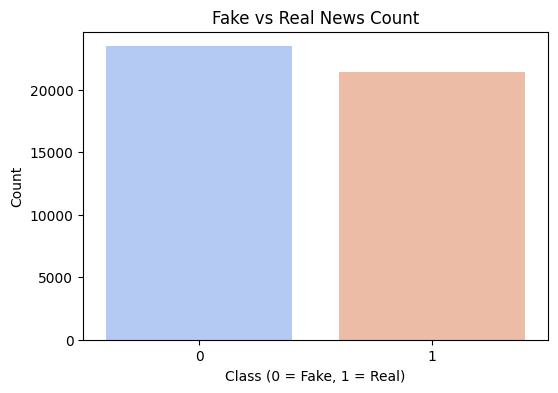

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import warnings
warnings.filterwarnings('ignore')

plt.figure(figsize=(6,4))
sns.countplot(x='class', data=data, palette='coolwarm')
plt.title('Fake vs Real News Count')
plt.xlabel('Class (0 = Fake, 1 = Real)')
plt.ylabel('Count')
plt.show()

### Histogram of Text Length (Fake vs Real)
This plot shows the distribution of text lengths for fake and real news. It helps understand which type of news usually has longer or shorter articles.  


In [27]:
data['text_length'] = data['text'].apply(lambda x: len(x.split()))

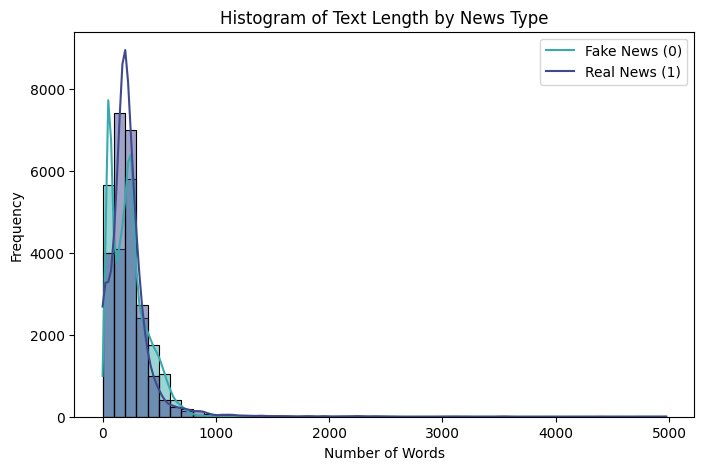

In [28]:
plt.figure(figsize=(8,5))
sns.histplot(
    data=data,
    x='text_length',
    hue='class',
    bins=50,
    kde=True,
    palette='mako'
)

plt.title('Histogram of Text Length by News Type')
plt.xlabel('Number of Words')
plt.ylabel('Frequency')

# Correct legend
plt.legend(labels=['Fake News (0)', 'Real News (1)'])

plt.show()


### Boxplot of Text Length (Fake vs Real)
This boxplot compares the text length of fake and real news articles. It shows the median, range, and outliers for both classes.Helps identify which type tends to be longer or shorter.


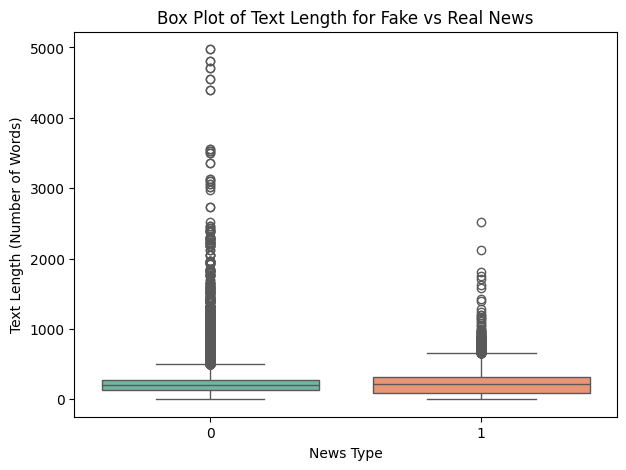

In [29]:
import warnings
warnings.filterwarnings('ignore')


plt.figure(figsize=(7,5))
sns.boxplot(x='class', y='text_length', data=data, palette='Set2')
plt.title('Box Plot of Text Length for Fake vs Real News')
plt.xlabel('News Type')
plt.ylabel('Text Length (Number of Words)')
plt.show()

### Correlation Heatmap
This heatmap shows the correlation between:
- `class` (fake or real)
- `text_length` (number of words)

It helps check whether text length influences whether news is fake or real.


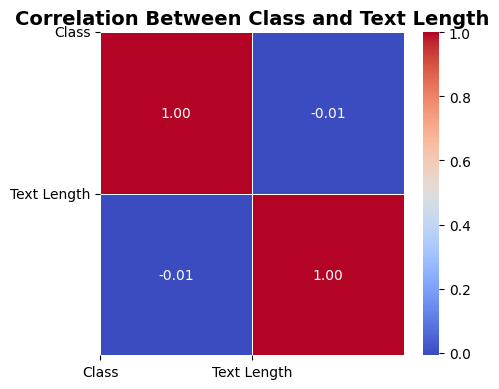

In [30]:
plt.figure(figsize=(5,4))
sns.heatmap(data[['class','text_length']].corr(), annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5, cbar=True)

plt.title('Correlation Between Class and Text Length', fontsize=14, fontweight='bold')
plt.xticks(ticks=[0,1], labels=['Class', 'Text Length'])
plt.yticks(ticks=[0,1], labels=['Class', 'Text Length'], rotation=0)
plt.tight_layout()
plt.show()



### WordCloud – Fake News
This WordCloud shows the most frequent meaningful words in Fake news articles. It helps us quickly identify common terms used in fake news.


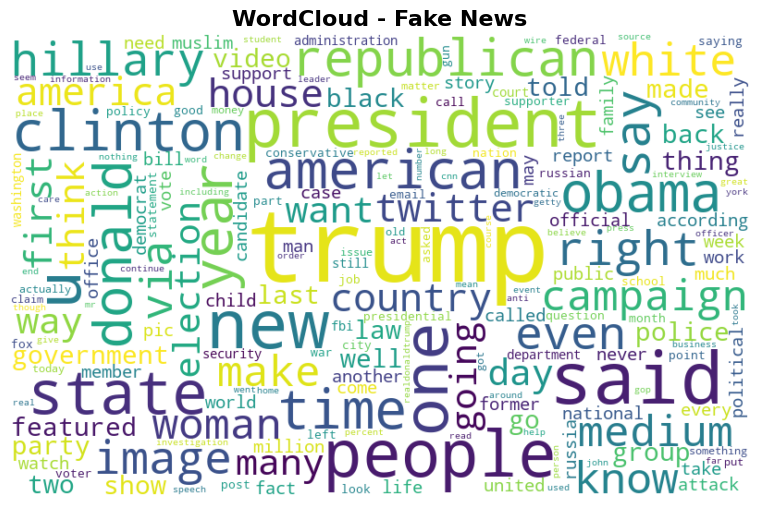

In [31]:
from wordcloud import WordCloud, STOPWORDS
stopwords_wc = set(STOPWORDS)

fake_text = ' '.join(data[data['class'] == 0]['text'])
wordcloud_fake = WordCloud(
    width=800, height=500, max_font_size=110,
    collocations=False, background_color='white', stopwords=stopwords_wc
).generate(fake_text)

plt.figure(figsize=(10,6))
plt.imshow(wordcloud_fake, interpolation='bilinear')
plt.axis('off')
plt.title('WordCloud - Fake News', fontsize=16, fontweight='bold')
plt.show()



### WordCloud – Real News
This WordCloud shows the most frequent meaningful words in Real news articles. Comparing with Fake news helps identify differences in language patterns.


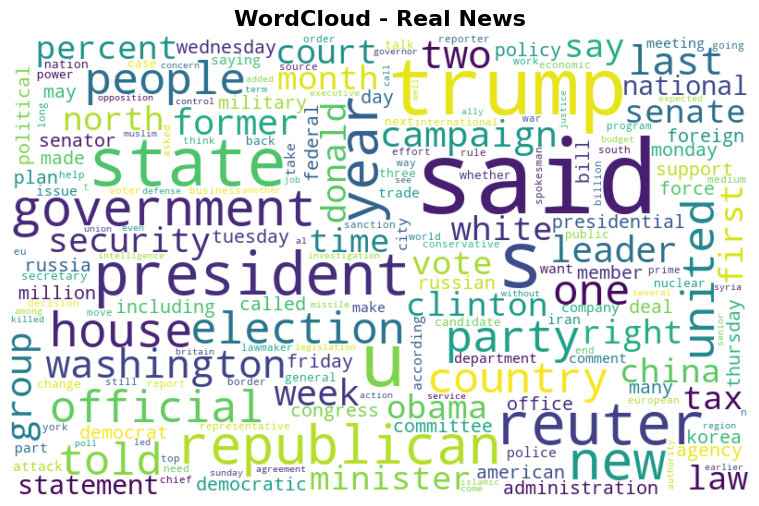

In [32]:
real_text = ' '.join(data[data['class'] == 1]['text'])
wordcloud_real = WordCloud(
    width=800, height=500, max_font_size=110,
    collocations=False, background_color='white', stopwords=stopwords_wc
).generate(real_text)

plt.figure(figsize=(10,6))
plt.imshow(wordcloud_real, interpolation='bilinear')
plt.axis('off')
plt.title('WordCloud - Real News', fontsize=16, fontweight='bold')
plt.show()



### Top 20 Most Common Words – Fake News
This bar plot shows the top 20 most common words in Fake news articles quantitatively. It provides a clear comparison of word frequency for analysis.


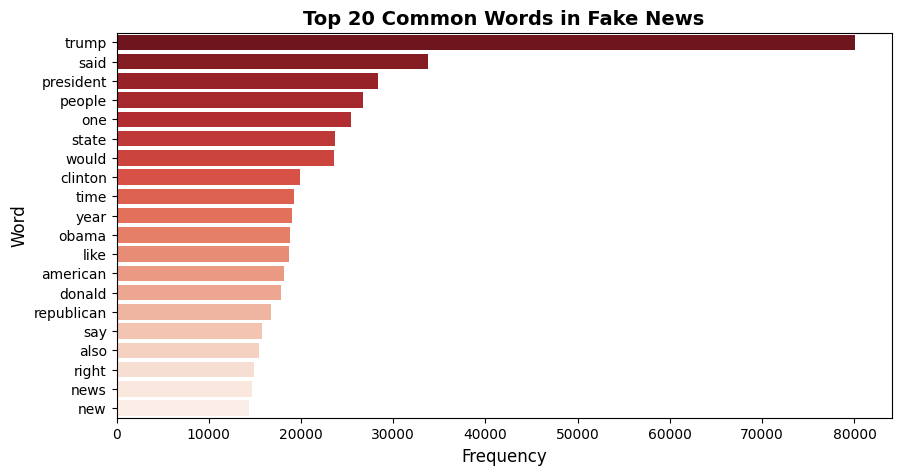

In [33]:
from collections import Counter
import warnings
warnings.filterwarnings('ignore')

fake_words = clean_and_tokenize(data[data['class']==0]['text'])
fake_common = Counter(fake_words).most_common(20)
fake_df_words = pd.DataFrame(fake_common, columns=['Word','Frequency'])

plt.figure(figsize=(10,5))
sns.barplot(x='Frequency', y='Word', data=fake_df_words, palette='Reds_r')
plt.title('Top 20 Common Words in Fake News', fontsize=14, fontweight='bold')
plt.xlabel('Frequency', fontsize=12)
plt.ylabel('Word', fontsize=12)
plt.show()



### Top 20 Most Common Words – Real News
This bar plot shows the top 20 most common words in Real news articles quantitatively. It complements the Fake news bar plot for comparison.


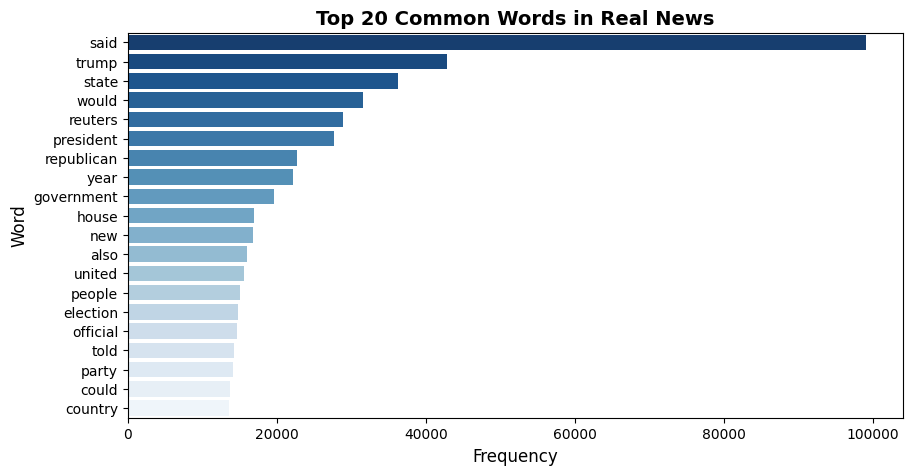

In [34]:
import warnings
warnings.filterwarnings('ignore')

real_words = clean_and_tokenize(data[data['class']==1]['text'])
real_common = Counter(real_words).most_common(20)
real_df_words = pd.DataFrame(real_common, columns=['Word','Frequency'])

plt.figure(figsize=(10,5))
sns.barplot(x='Frequency', y='Word', data=real_df_words, palette='Blues_r')
plt.title('Top 20 Common Words in Real News', fontsize=14, fontweight='bold')
plt.xlabel('Frequency', fontsize=12)
plt.ylabel('Word', fontsize=12)
plt.show()



### Scatter Plot — index vs text length
This scatter plot shows the distribution of text lengths across sampled articles. It is an optional visual check for patterns or outliers in the dataset.


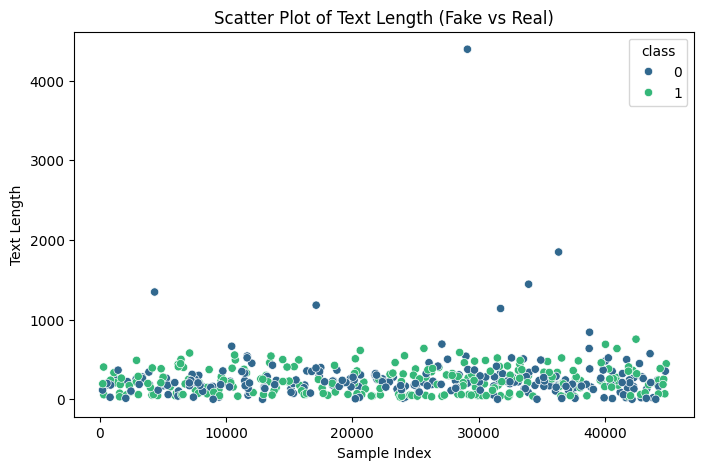

In [35]:
sample_df = data.sample(500, random_state=42) 
plt.figure(figsize=(8,5))
sns.scatterplot(x=sample_df.index, y='text_length', hue='class', data=sample_df, palette='viridis')
plt.title('Scatter Plot of Text Length (Fake vs Real)')
plt.xlabel('Sample Index')
plt.ylabel('Text Length')
plt.show()

### Balancing the Dataset
Fake news is more than real news, so I balanced the dataset by:

- Downsampling fake news  
- Keeping real news the same  
- Merging and shuffling both classes  

This creates a 50-50 balanced dataset, which helps the model learn better.


In [36]:
fake_news = data[data['class'] == 0]
real_news = data[data['class'] == 1]

# Downsample fake news to match real news count
fake_downsampled = fake_news.sample(len(real_news), random_state=42)

# Combine
balanced_data = pd.concat([fake_downsampled, real_news])
balanced_data = balanced_data.sample(frac=1, random_state=42)  # shuffle

# Check new distribution
balanced_data['class'].value_counts()

class
0    21417
1    21417
Name: count, dtype: int64

### Model Traning 
The dataset is split into training (75%) and testing (25%) sets using `train_test_split`.  
This ensures the model is trained on one portion of the data and tested on unseen data to evaluate performance fairly.

In [37]:
x = balanced_data['text']
y = balanced_data['class']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)

### Converting text into numerical features (TF-IDF)
Use **TfidfVectorizer** to convert the news text into numbers so the ML models can understand it.


In [38]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorization = TfidfVectorizer(max_features=5000, ngram_range=(1,2))
xv_train = vectorization.fit_transform(x_train)
xv_test = vectorization.transform(x_test)

### Logistic Regression Model
Logistic Regression is a simple yet powerful linear model used for binary classification.  
It estimates probabilities using a sigmoid function and performs well on linearly separable data like Fake vs Real news.

In [39]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression()
LR.fit(xv_train, y_train)

LogisticRegression()

In [40]:
pred_lr = LR.predict(xv_test)

In [41]:
LR.score(xv_test, y_test)

0.9902885423475581

In [42]:
print(classification_report(y_test, pred_lr))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      5429
           1       0.99      0.99      0.99      5280

    accuracy                           0.99     10709
   macro avg       0.99      0.99      0.99     10709
weighted avg       0.99      0.99      0.99     10709



***Confusion Matrix for Logistic Regression***

This confusion matrix shows how well the Logistic Regression model correctly predicts Fake (0) and Real (1) news.  
It helps visualize true positives, true negatives, and mistakes.


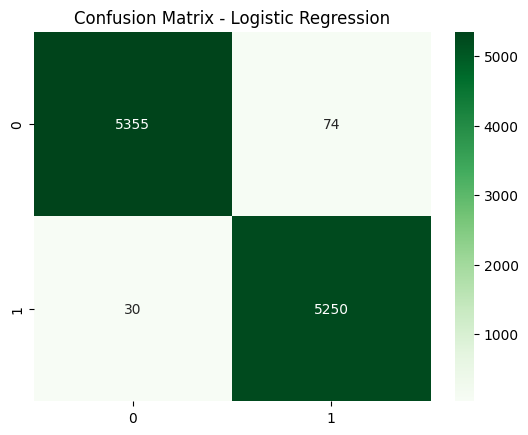

In [43]:
# Confusion Matrix for Logistic Regression
from sklearn.metrics import confusion_matrix
cm_lr = confusion_matrix(y_test, pred_lr)
sns.heatmap(cm_lr, annot=True, fmt="d", cmap="Greens")
plt.title("Confusion Matrix - Logistic Regression")
plt.show()

### Naive Bayes Classifier
Naive Bayes uses Bayes’ theorem and assumes all features (words) are independent.  
It works very well for text classification tasks like Fake News Detection because it handles high-dimensional text data efficiently.

In [44]:
from sklearn.naive_bayes import MultinomialNB
NB = MultinomialNB()
NB.fit(xv_train, y_train)

MultinomialNB()

In [45]:
pred_nb = NB.predict(xv_test)

In [46]:
print("Naive Bayes Accuracy:", NB.score(xv_test, y_test))

Naive Bayes Accuracy: 0.9374358016621533


In [47]:
print(classification_report(y_test, pred_nb))

              precision    recall  f1-score   support

           0       0.96      0.91      0.94      5429
           1       0.91      0.96      0.94      5280

    accuracy                           0.94     10709
   macro avg       0.94      0.94      0.94     10709
weighted avg       0.94      0.94      0.94     10709



***Confusion Matrix for Naive Bayes***

This confusion matrix shows the performance of the Naive Bayes model.  
It helps visualize how many fake and real news articles were predicted correctly or incorrectly.


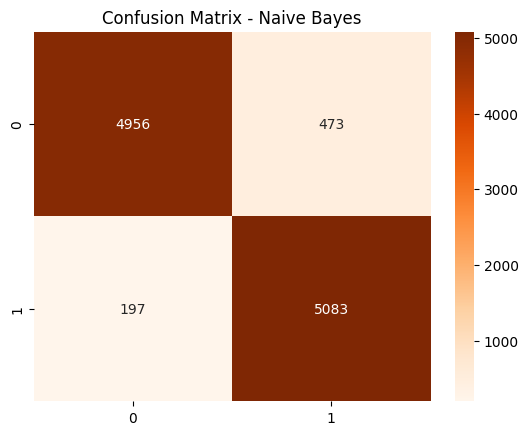

In [48]:
# Confusion Matrix for Naive Bayes
cm_nb = confusion_matrix(y_test, pred_nb)
sns.heatmap(cm_nb, annot=True, fmt="d", cmap="Oranges")
plt.title("Confusion Matrix - Naive Bayes")
plt.show()

### SVM Model (Calibrated LinearSVC)
Here create a LinearSVC model and wrap it with `CalibratedClassifierCV` to enable probability predictions.
- **LinearSVC** → powerful for text classification  
- **CalibratedClassifierCV** → support `predict_proba()` support  
- Trained on TF-IDF features


In [49]:
from sklearn.svm import LinearSVC
from sklearn.calibration import CalibratedClassifierCV

base_svm = LinearSVC(max_iter=5000)
svm_model = CalibratedClassifierCV(base_svm, cv=5)

svm_model.fit(xv_train, y_train)


CalibratedClassifierCV(cv=5, estimator=LinearSVC(max_iter=5000))

In [50]:
pred_svm = svm_model.predict(xv_test)

In [51]:
print("Accuracy:", accuracy_score(y_test, pred_svm))

Accuracy: 0.9962648239798301


In [52]:
print(classification_report(y_test, pred_svm))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5429
           1       1.00      1.00      1.00      5280

    accuracy                           1.00     10709
   macro avg       1.00      1.00      1.00     10709
weighted avg       1.00      1.00      1.00     10709



***Confusion Matrix for SVM***

This confusion matrix shows how accurately the SVM model predicts  
Fake (0) and Real (1) news.

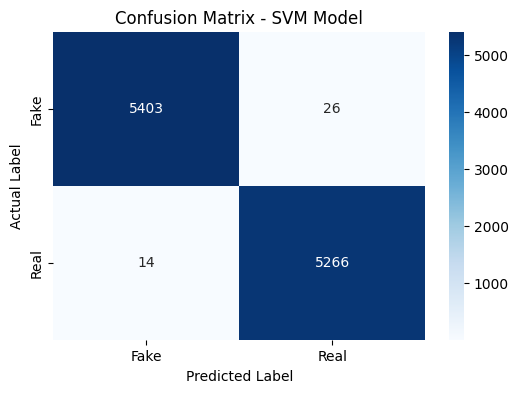

In [53]:
# Confusion Matrix for SVM
cm = confusion_matrix(y_test, pred_svm)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=["Fake", "Real"],
            yticklabels=["Fake", "Real"])
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.title("Confusion Matrix - SVM Model")
plt.show()

### Comparing All Models
This table summarizes each model’s performance in terms of **Accuracy, Precision, Recall, and F1-Score** for both Fake and Real news. It allows easy comparison of which model performs best overall.

In [54]:
from sklearn.metrics import classification_report
import pandas as pd
import numpy as np

all_results = {}

model_preds = {
    "Logistic Regression": pred_lr,
    "Naive Bayes": pred_nb,
    "SVM": pred_svm
}

for name, y_pred in model_preds.items():
    report = classification_report(y_test, y_pred, output_dict=True)

    all_results[name] = {
        "Accuracy": np.round(accuracy_score(y_test, y_pred), 4),
        "Precision (Fake)": np.round(report['0']['precision'], 4),
        "Recall (Fake)": np.round(report['0']['recall'], 4),
        "F1-Score (Fake)": np.round(report['0']['f1-score'], 4),
        "Precision (Real)": np.round(report['1']['precision'], 4),
        "Recall (Real)": np.round(report['1']['recall'], 4),
        "F1-Score (Real)": np.round(report['1']['f1-score'], 4)
    }

results_df = pd.DataFrame(all_results).T  
results_df = results_df.sort_values(by="Accuracy", ascending=False)

print("**All Models Performance Table**")
results_df


**All Models Performance Table**


,Accuracy,Precision (Fake),Recall (Fake),F1-Score (Fake),Precision (Real),Recall (Real),F1-Score (Real)
SVM,0.9963,0.9974,0.9952,0.9963,0.9951,0.9973,0.9962
Logistic Regression,0.9903,0.9944,0.9864,0.9904,0.9861,0.9943,0.9902
Naive Bayes,0.9374,0.9618,0.9129,0.9367,0.9149,0.9627,0.9382


**Best Model Selection**

Based on the performance metrics (Accuracy, Precision, Recall, F1-Score), the **SVM (Calibrated LinearSVC)** model performs the best for this Fake News Detection project.  
It achieves the **highest accuracy (99.63%)** and shows the most balanced and consistent results for both Fake and Real news.

✅ **SVM is selected as the final model** for making predictions in this project.


### Manual Testing on New Unseen Data 

Manually test the SVM model using 20 unseen samples (10 fake + 10 real) taken randomly from the dataset.

1. Select 10 fake and 10 real news articles.
2. Clean the text using the same preprocessing function.
3. Convert text into TF-IDF vectors.
4. Predict using the trained SVM model.
5. Display actual vs predicted labels.

This helps verify the model’s real-world performance on new data.

In [55]:
#Create NEW manual testing dataset (10 fake + 10 real)
fake_manual = fake_news.sample(10, random_state=42)
real_manual = real_news.sample(10, random_state=42)

manual_testing_df = pd.concat([fake_manual, real_manual], axis=0)
manual_testing_df = manual_testing_df.sample(frac=1, random_state=42).reset_index(drop=True)

manual_testing_df['text_clean'] = manual_testing_df['text'].apply(wordopt)

X_manual = vectorization.transform(manual_testing_df['text_clean'])

manual_testing_df['Prediction'] = svm_model.predict(X_manual)
manual_testing_df['Prediction_Label'] = manual_testing_df['Prediction'].replace({0: 'Fake News', 1: 'Real News'})

print("***Manual Testing Results (SVM)***")
manual_testing_df[['text', 'class', 'Prediction', 'Prediction_Label']]


***Manual Testing Results (SVM)***


,text,class,Prediction,Prediction_Label
0,case left protesting something childish smell ...,0,0,Fake News
1,manila reuters philippine president rodrigo du...,1,1,Real News
2,washington reuters rick perry president elect ...,1,1,Real News
3,dropping republican presidential race dr ben c...,0,0,Fake News
4,president elect donald trump trouble finding p...,0,0,Fake News
5,hillary coughing point almost passing spewing ...,0,0,Fake News
6,london reuters prime minister theresa may outr...,1,1,Real News
7,leftist professor donating chump change either...,0,0,Fake News
8,strasbourg reuters european commission chief j...,1,1,Real News
9,washington reuters republican ted cruz key con...,1,1,Real News


### Single News Article Prediction (Using SVM)

Test the model with a **custom news article** entered by the user.

1. Take news input from the user.
2. Clean and preprocess the text using the same function.
3. Convert the text into TF-IDF vector.
4. Use the trained SVM model to predict:
   - Fake or Real
   - Probability (confidence level)
5. Display the final prediction.

In [58]:
# Test a Single New Article Using SVM (Calibrated) ---

import numpy as np

news_input = input("Enter a news article for testing: ").strip()

if news_input:
    news_vector = vectorization.transform([wordopt(news_input)])
    
    proba = svm_model.predict_proba(news_vector)[0]   # [prob_fake, prob_real]

    pred = np.argmax(proba)   # 0 or 1

    label = "Fake News" if pred == 0 else "Real News"

    confidence_percent = proba[pred] * 100

    print("\n=== Single Article Prediction (Calibrated SVM) ===")
    print(f"Prediction: {label}")
    print(f"Confidence: {confidence_percent:.2f}%")

else:
    print("No input provided!")


Enter a news article for testing:  RTOne of the most visible members of the armed militia that took over a wildlife refuge in Oregon says his four foster sons were taken away due to his involvement in the standoff, and he blames the federal government who  must have gotten to the governor. Robert  LaVoy  Finicum and his wife Jeanette have fostered more than 50 boys over the last decade at their ranch near Chino Valley, Arizona. The couple is licensed and has a care contract with the Catholic Charities Community Services. Many of the children came from mental hospitals, drug rehabs and group homes for emotionally distressed youth, he told Oregon Public Broadcasting (OPB). IMAGE: Robert  LaVoy  Finicum. My ranch has been a great tool for these boys,  Finicum said.  It has done a lot of good. He traveled to Oregon to take part in the takeover of the Malheur National Wildlife Refuge at the beginning of January, leaving Jeanette to care for the four boys. But now the Finicums have no more f


=== Single Article Prediction (Calibrated SVM) ===
Prediction: Fake News
Confidence: 99.97%


### Saving the Trained Model and Vectorizer
Save the final SVM model and the TF-IDF vectorizer using `pickle`.

- `svm_model.pkl` → stored trained SVM model  
- `tfidf_vectorizer.pkl` → stored fitted vectorizer  

These files are used later in the Streamlit app to make predictions without retraining the model.


In [57]:
import pickle

# Save the calibrated LinearSVC model
with open("svm_model.pkl", "wb") as model_file:
    pickle.dump(svm_model, model_file)

# Save the fitted TF-IDF vectorizer
with open("tfidf_vectorizer.pkl", "wb") as vectorizer_file:
    pickle.dump(vectorization, vectorizer_file)

print("✅ Calibrated LinearSVC model and TF-IDF vectorizer saved successfully!")


✅ Calibrated LinearSVC model and TF-IDF vectorizer saved successfully!
